In [1]:
# Import necessary libraries
import pandas as pd
import pyspark.sql.functions as F
from pyspark.sql import SparkSession
from kedro.io import DataCatalog
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
%load_ext kedro.ipython

The kedro.ipython extension is already loaded. To reload it, use:
  %reload_ext kedro.ipython


In [3]:
# Load datasets
symptoms_df = catalog.load("symptoms")
print("symptoms data loaded..")

[07/22/24 16:54:21] INFO     Loading data from symptoms (CSVDataset)...                         ]8;id=110530;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=72572;file:///opt/anaconda3/envs/kedro-environment/lib/python3.8/site-packages/kedro/io/data_catalog.py#508\508]8;;\

symptoms data loaded..


In [4]:
# 1. Display Basic Information
def basic_info(df):
    print("Dataset Shape:", df.shape)
    print("\nColumn Names:", df.columns)
    print("\nData Types:\n", df.dtypes)
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nDuplicate Records:", df.duplicated().sum())

basic_info(symptoms_df)

Dataset Shape: (1423, 9)

Column Names: Index(['PATIENT', 'GENDER', 'RACE', 'ETHNICITY', 'AGE_BEGIN', 'AGE_END',
       'PATHOLOGY', 'NUM_SYMPTOMS', 'SYMPTOMS'],
      dtype='object')

Data Types:
 PATIENT          object
GENDER          float64
RACE             object
ETHNICITY        object
AGE_BEGIN         int64
AGE_END         float64
PATHOLOGY        object
NUM_SYMPTOMS      int64
SYMPTOMS         object
dtype: object

Missing Values:
 PATIENT            0
GENDER          1423
RACE               0
ETHNICITY          0
AGE_BEGIN          0
AGE_END         1423
PATHOLOGY          0
NUM_SYMPTOMS       0
SYMPTOMS           0
dtype: int64

Duplicate Records: 0


In [5]:
# 2. Summary Statistics
def summary_statistics(df):
    print("\nSummary Statistics:\n", df.describe(include='all'))

summary_statistics(symptoms_df)



Summary Statistics:
                                      PATIENT  GENDER   RACE    ETHNICITY  \
count                                   1423     0.0   1423         1423   
unique                                   948     NaN      6            2   
top     8b509749-aaab-30b8-9a67-e8620eec19f0     NaN  white  nonhispanic   
freq                                       2     NaN   1127          826   
mean                                     NaN     NaN    NaN          NaN   
std                                      NaN     NaN    NaN          NaN   
min                                      NaN     NaN    NaN          NaN   
25%                                      NaN     NaN    NaN          NaN   
50%                                      NaN     NaN    NaN          NaN   
75%                                      NaN     NaN    NaN          NaN   
max                                      NaN     NaN    NaN          NaN   

          AGE_BEGIN  AGE_END            PATHOLOGY  NUM_SYMPTOMS  

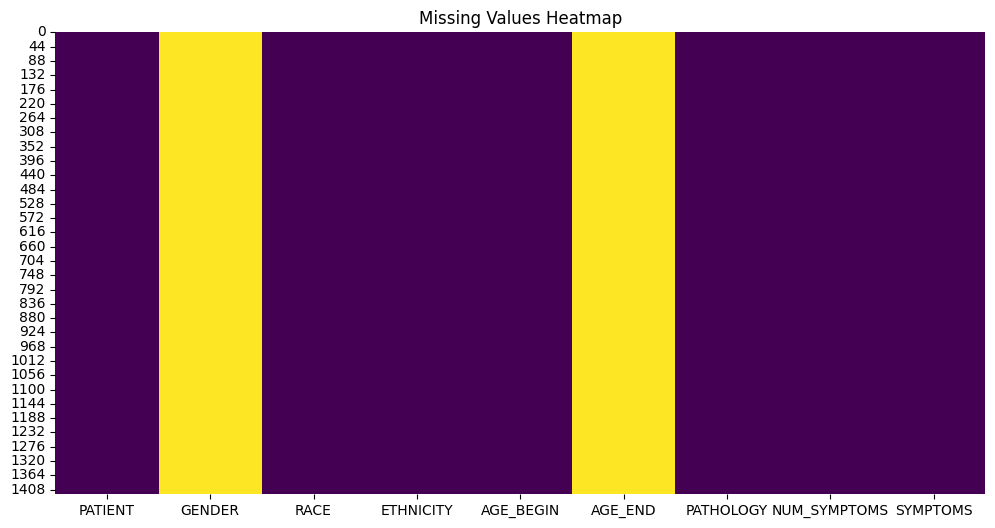

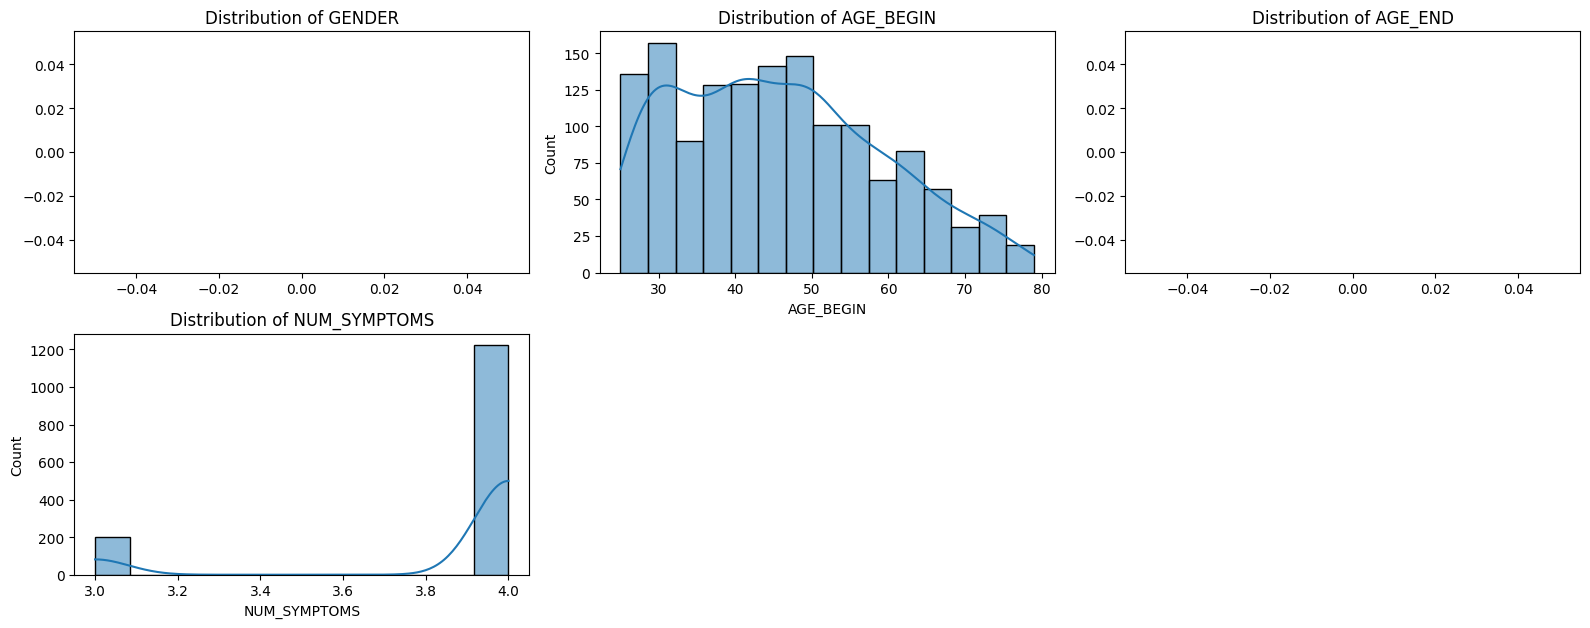

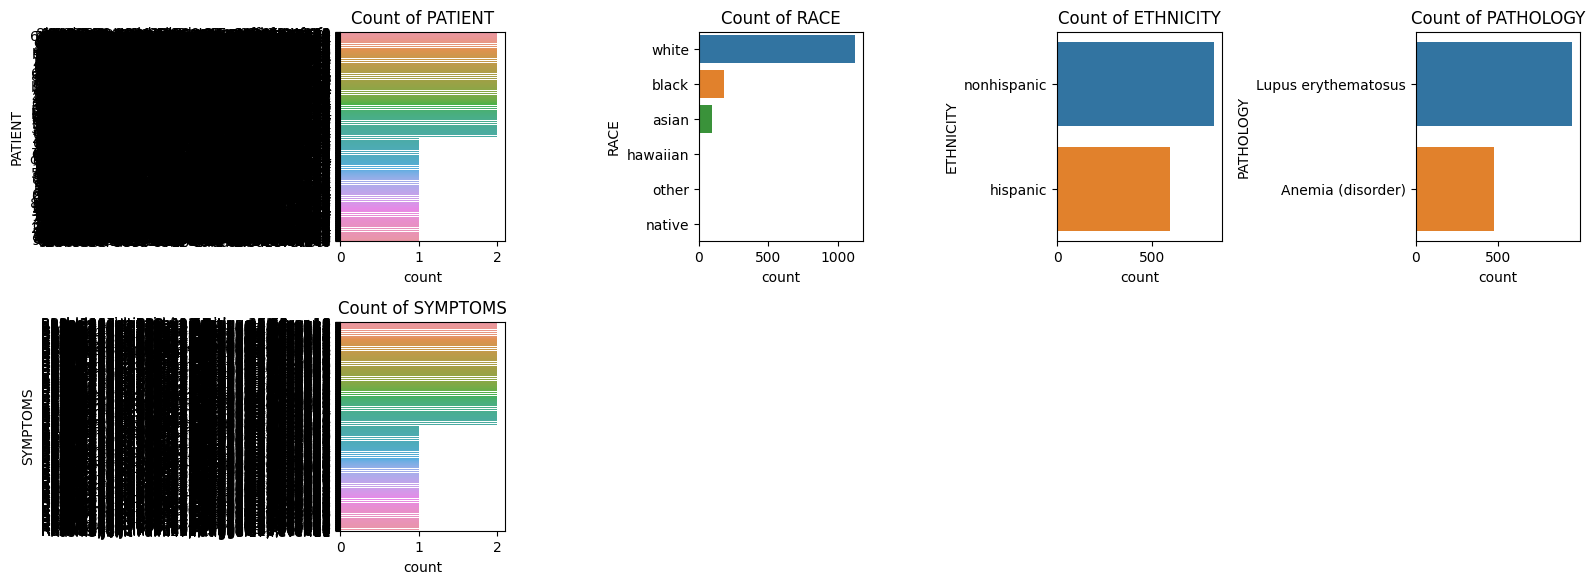

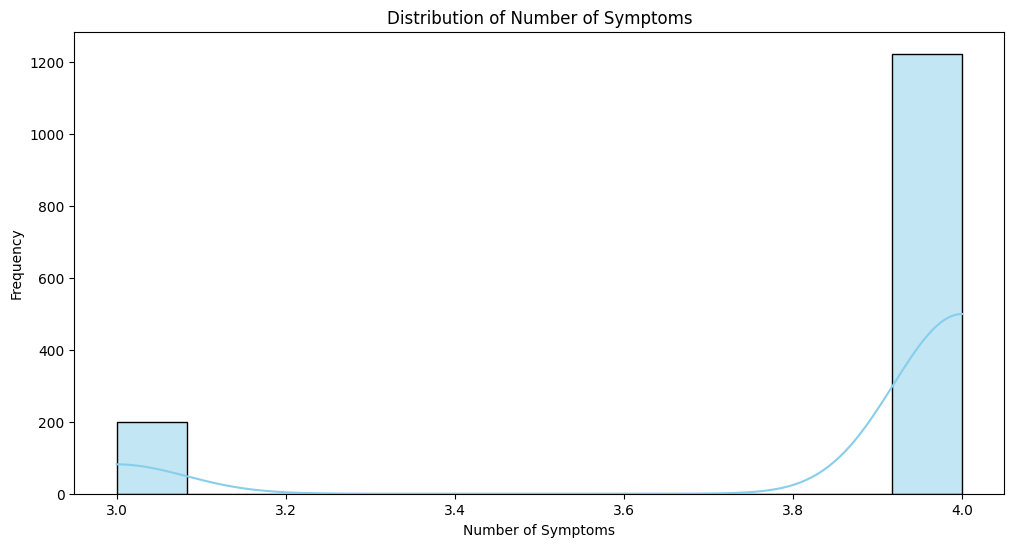

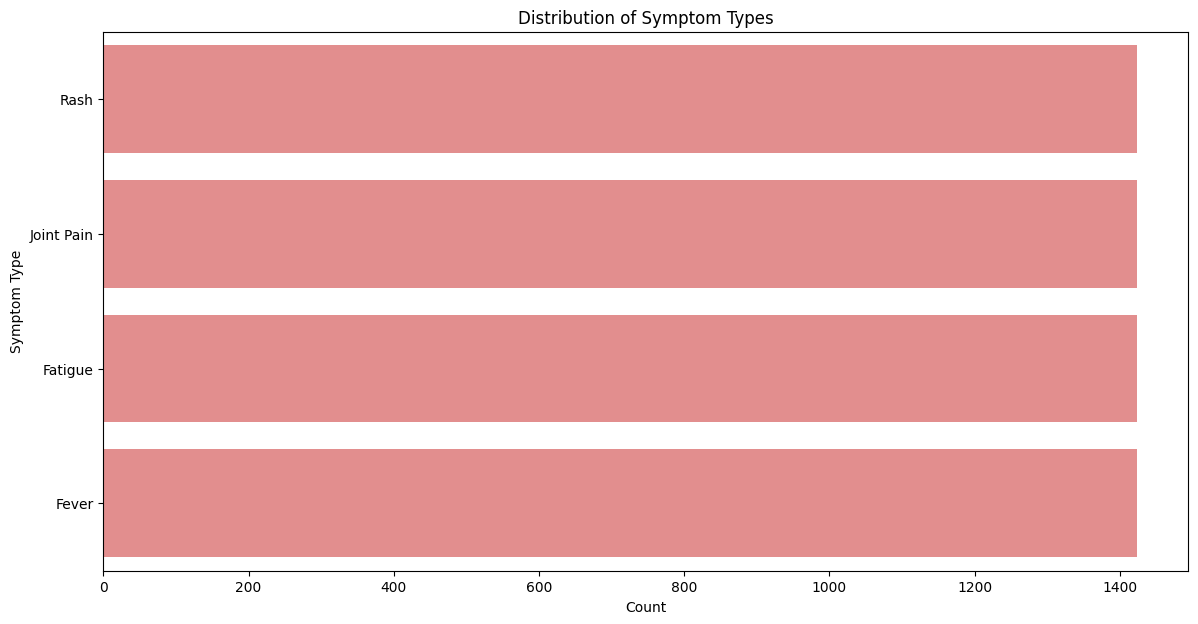

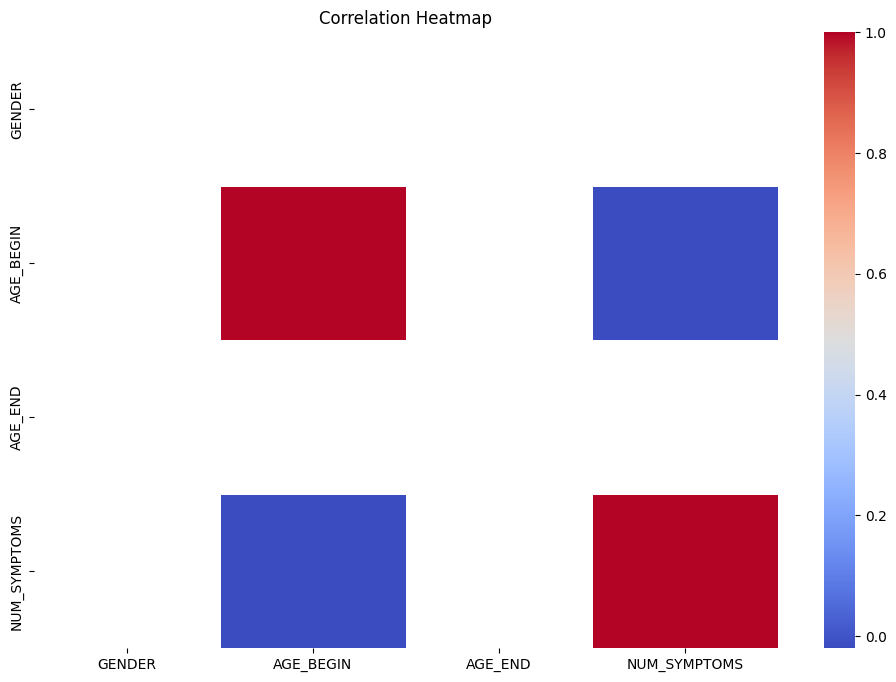

In [6]:
# 3. Visualizations

# 3.1 Missing Values Heatmap
def plot_missing_values(df):
    plt.figure(figsize=(12, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Heatmap')
    plt.show()

plot_missing_values(symptoms_df)

# 3.2 Distribution of Numerical Columns
def plot_numerical_distributions(df):
    numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(numerical_columns, 1):
        plt.subplot(4, 3, i)
        sns.histplot(df[col].dropna(), kde=True)
        plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(symptoms_df)

# 3.3 Count of Categorical Columns
def plot_categorical_counts(df):
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
    
    plt.figure(figsize=(16, 20))
    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(7, 4, i)
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Count of {col}')
    plt.tight_layout()
    plt.show()

plot_categorical_counts(symptoms_df)

# 3.4 Analysis of Symptoms
def plot_symptom_distribution(df):
    df['NUM_SYMPTOMS'] = df['NUM_SYMPTOMS'].astype(int)
    
    plt.figure(figsize=(12, 6))
    sns.histplot(df['NUM_SYMPTOMS'], kde=True, color='skyblue')
    plt.title('Distribution of Number of Symptoms')
    plt.xlabel('Number of Symptoms')
    plt.ylabel('Frequency')
    plt.show()

plot_symptom_distribution(symptoms_df)

# 3.5 Analysis of Symptom Types
def plot_symptom_types(df):
    # Extract symptom types and counts
    symptom_types = df['SYMPTOMS'].dropna().str.split(';', expand=True).stack().str.split(':', expand=True)[0]
    
    plt.figure(figsize=(14, 7))
    sns.countplot(y=symptom_types, order=symptom_types.value_counts().index, color='lightcoral')
    plt.title('Distribution of Symptom Types')
    plt.xlabel('Count')
    plt.ylabel('Symptom Type')
    plt.show()

plot_symptom_types(symptoms_df)

# 3.6 Correlation Heatmap (Numerical columns only)
def plot_correlation_heatmap(df):
    plt.figure(figsize=(12, 8))
    correlation_matrix = df.select_dtypes(include=[np.number]).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

plot_correlation_heatmap(symptoms_df)

In [7]:
# 4. Summary of Issues
def summarize_issues(df):
    print("\nSummary of Data Quality Issues:")
    
    # Check for missing values
    missing_values = df.isnull().sum()
    print("\nMissing Values:")
    print(missing_values[missing_values > 0])
    
    # Check for duplicate records
    duplicate_count = df.duplicated().sum()
    print("\nDuplicate Records:", duplicate_count)
    
    # Check for invalid or unusual values
    print("\nInvalid Data Checks:")
    # Example: Check if AGE_BEGIN or AGE_END are unrealistic (e.g., negative values)
    unrealistic_age_begin = (df['AGE_BEGIN'] < 0).sum()
    unrealistic_age_end = (df['AGE_END'] < 0).sum()
    print(f"Unrealistic AGE_BEGIN values: {unrealistic_age_begin}")
    print(f"Unrealistic AGE_END values: {unrealistic_age_end}")
    
    # Check for unusual symptom counts (e.g., extremely high or low values)
    print("\nUnusual Symptom Counts:")
    q1 = df['NUM_SYMPTOMS'].quantile(0.25)
    q3 = df['NUM_SYMPTOMS'].quantile(0.75)
    iqr = q3 - q1
    outliers = ((df['NUM_SYMPTOMS'] < (q1 - 1.5 * iqr)) | (df['NUM_SYMPTOMS'] > (q3 + 1.5 * iqr))).sum()
    print(f"Outliers in NUM_SYMPTOMS: {outliers}")

summarize_issues(symptoms_df)



Summary of Data Quality Issues:

Missing Values:
GENDER     1423
AGE_END    1423
dtype: int64

Duplicate Records: 0

Invalid Data Checks:
Unrealistic AGE_BEGIN values: 0
Unrealistic AGE_END values: 0

Unusual Symptom Counts:
Outliers in NUM_SYMPTOMS: 200


In [ ]:
# Load datasets
symptoms_df = catalog.load("symptoms")
print("symptoms data loaded..")

In [5]:
# Column mapping
column_mapping = {
    'PATIENT': 'patient_id',
    'GENDER': 'gender',
    'RACE': 'race',
    'ETHNICITY': 'ethnicity',
    'AGE_BEGIN': 'age_begin',
    'AGE_END': 'age_end',
    'PATHOLOGY': 'pathology',
    'NUM_SYMPTOMS': 'num_symptoms',
    'SYMPTOMS': 'symptoms'
}

# Rename columns
symptoms_df.rename(columns=column_mapping, inplace=True)

# Initial record count
total_records = len(symptoms_df)

# Remove duplicate records
duplicate_records = symptoms_df.duplicated().sum()
symptoms_df.drop_duplicates(inplace=True)

# Remove Gender, AGE_BEGIN, AGE_END columns
symptoms_df.drop(columns=['gender', 'age_begin', 'age_end'], inplace=True)


# Summary of findings
summary = {
    'total_records': total_records,
    'duplicate_records': duplicate_records,
    'final_record_count': len(symptoms_df)
}

print(summary)

{'total_records': 1423, 'duplicate_records': 0, 'final_record_count': 1423}
